<h1 style = "color: blue; font-size: 40px;">Plot</h1>

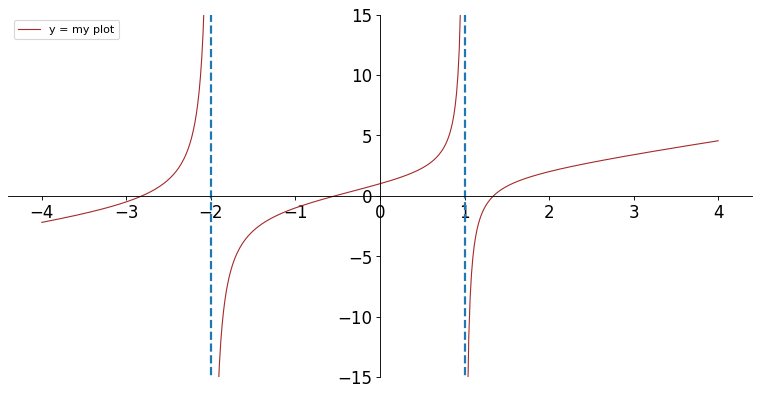

In [1]:
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 + 2*x**2 - 3*x - 2)/(x**2 + x - 2)

pl.figure(figsize=(12, 6), dpi=80)
pl.subplot(1, 1, 1)
x = np.linspace(-4, 4, 500, endpoint=True)
c = f(x)

pl.xlim(x.min() * 1.1, x.max() * 1.1)
pl.ylim(c.min() * 1.1, c.max() * 1.1)

up = 100
down = -100

c[c > up] = np.inf
c[c < down] = -np.inf


"""
Alters the position of the axis - moves them to the centre
"""
ax = pl.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

ylim = ax.get_ylim()
plt.vlines([-2,1], ylim[0], ylim[1], linewidth=2, linestyle="dashed")

pl.plot(x, c, color="brown",  linewidth=1, linestyle="-", 
              label="y = my plot")

pl.legend(loc='upper left')


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(15)

plt.ylim((-15,15))

plt.show()

<h1 style = "color: red; font-size: 40px;">Matrix</h1>

In [2]:
n = 6
matrix = np.array(range(1,n*n+1), dtype = np.int64).reshape(n,n)
matrix

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=int64)

<h1 style = "color: green; font-size: 30px;">a)</h1>

In [3]:
def hor_snake(field):
    snake = []
    n = len(field)
    k = 0
    row = 0
    direction = 1
    part = field[row,k:n-k:direction]
    while len(part):
        snake = np.append(snake, part)
        k += 1
        row += 1
        direction = -direction
        if (direction < 0):
            part = field[row, n-k-1:k-1:direction]
        else:
            part = field[row, k:n-k:direction]
            
    return snake

In [4]:
hor_snake(matrix)

array([ 1.,  2.,  3.,  4.,  5.,  6., 11., 10.,  9.,  8., 15., 16.])

<h1 style = "color: green; font-size: 30px;">b)</h1>

In [5]:
def trim(m, pos, axis):
    if m.size:
        m = np.delete(m,pos,axis)
    return m

def spiral_upper_angle(mtr):
    n = mtr.shape[1]
    snake = np.array([], dtype='int64')
    n = len(mtr)
    while len(mtr) > (n + 1) // 2:
        mtr = np.delete(mtr, -1, 0)
        
    while mtr.size:
        snake = np.append(snake, mtr[0][::-1])
        mtr = np.delete(mtr, 0, 0)
        mtr = np.delete(mtr, 0, 1)
        mtr = trim(mtr, mtr.shape[1] - 1, 1)
        snake = np.append(snake, np.diag(mtr, 0))
        
        mtr = np.flipud(mtr)
        
        reverse_diag = mtr.shape[1] // 2
        frm = 1
        if not n % 2:
            frm = 0
        snake =  np.append(snake, np.diag(mtr, reverse_diag)[frm:])
        mtr = np.flipud(mtr)
        mtr = trim(mtr, mtr.shape[0] - 1, 0)
        mtr = trim(mtr, 0, 1)
        mtr = trim(mtr, mtr.shape[1]-1, 1)
    return snake
    
        

In [6]:
n = 100
m = np.array(range(1, n*n+1), dtype = np.int64).reshape(n,n)

In [7]:
spiral_upper_angle(m)

array([ 100,   99,   98, ..., 2449, 2550, 2551], dtype=int64)

<h1 style = "color: orange; font-size: 40px;">Dictionaries</h1>

In [14]:
from collections import defaultdict

In [23]:
nums = [np.random.randint(-20, 20) for i in range(10)]
len(nums)

10

In [24]:
unique = defaultdict(None)
for i in range(len(nums)):
    number = nums[i]
    unique[number] = i
res = []
for j in unique:
    res.append(j)
res

[9, 13, 4, 10, -19, 6, 2, -2, 14]

In [28]:
def f(x):
    y = set()
    for item in x:
        y.add(item*item)
    return y
points = set([np.random.randint(-150, 150) for i in range(100)])
len(points)
print(f(points))

{4096, 16384, 1024, 1, 15876, 9, 15376, 529, 17424, 36, 17956, 2601, 49, 7225, 7744, 576, 1600, 5184, 10816, 9801, 81, 8281, 6241, 19044, 13924, 11881, 121, 4225, 2704, 5776, 1681, 4761, 2209, 169, 3249, 22201, 9409, 20164, 196, 729, 1764, 7396, 2809, 6400, 16641, 2304, 15625, 17161, 8464, 11025, 10000, 784, 3364, 18225, 1849, 9025, 324, 12100, 2401, 5476, 10609, 3969, 9604, 1936, 11664, 400, 8100, 13225, 5041, 441, 961, 6084, 2500, 8649, 3025, 20449, 11236, 2025, 1521}


In [57]:
function = dict()
for i in range(100):
    key = np.random.randint(-50, 50)
    if not key in function.keys():
        function[key] = np.random.randint(100)
reverse_f = dict()
for (x, y) in function.items():
    reverse_f[y] = x
reverse_f

{8: -18,
 50: 9,
 9: -34,
 34: 43,
 78: 6,
 48: -12,
 6: -30,
 60: 17,
 1: -33,
 7: -27,
 77: 27,
 46: 24,
 55: 13,
 61: -50,
 23: -42,
 99: 2,
 90: 20,
 91: 34,
 81: 21,
 39: -44,
 47: -38,
 52: -41,
 65: 37,
 88: -16,
 73: 1,
 54: -46,
 5: -40,
 37: 31,
 70: -20,
 83: -29,
 27: 23,
 21: -11,
 25: -6,
 19: 15,
 28: 14,
 36: -13,
 3: -1,
 14: -24,
 41: -8,
 16: -15,
 69: 38,
 63: 25,
 4: 28,
 85: -49}

In [48]:
def inv(func, b):
    for (x,y) in func.items():
        if (y == b)

{1: 2}